# The plotter

I will plot histograms based on the 

In [1]:
%matplotlib inline                           
%config InlineBackend.figure_format='retina'  

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (14.0, 14.0)    

In [2]:
file0 = "/home/usuario/Documents/Mestrado/FFIs/testeall/clean/masters/season0/"
file1 = "/home/usuario/Documents/Mestrado/FFIs/testeall/clean/masters/season1/"
file2 = "/home/usuario/Documents/Mestrado/FFIs/testeall/clean/masters/season2/"
file3 = "/home/usuario/Documents/Mestrado/FFIs/testeall/clean/masters/season3/"

col_ap = ('kic_id','x','y','kepmag','mag','err')
col_flux = ('kic_id','x','y','flx','flx_err')
col_star = ('kic_id','x','y')
# sky1 = pd.read_csv(file0+'1_master.ap',sep=',',header=None,names=(col_ap))
sky1 = pd.read_csv(file0+'teste_master.ap',sep=',',header=None,names=(col_ap))

In [8]:
# plt.scatter(sky1['mag'],sky1['mag']-sky1['kepmag'],s=0.1)

In [4]:
def coord_min(x,y,xs,ys):
    array=[]
    dif=[]
    closest=[]
    sigmax = np.std(xs)
    sigmay = np.std(ys)
    for i in range(len(xs)):
        if abs(x - xs[i])<sigmax/50 and abs(y - ys[i])<sigmay/50:
            #array.append([xs[i],ys[i]])
            dif.append(np.sqrt((x - xs[i])**2+(y - ys[i])**2))
            if np.min(dif) == np.sqrt((x - xs[i])**2+(y - ys[i])**2):
                closest.append([xs[i],ys[i]])
    return closest[-1]

In [5]:
def kic_skygroup(vector,n_sky):
    new = vector[(vector.kct_sky_group_id_value==n_sky)]
    return new

In [6]:
def bla(season,skygroup):
    import matplotlib.pyplot as plt
    array=[]
    file0 = "/home/usuario/Documents/Mestrado/FFIs/testeall/clean/masters/season0/"
    file1 = "/home/usuario/Documents/Mestrado/FFIs/testeall/clean/masters/season1/"
    file2 = "/home/usuario/Documents/Mestrado/FFIs/testeall/clean/masters/season2/"
    file3 = "/home/usuario/Documents/Mestrado/FFIs/testeall/clean/masters/season3/"

    col_ap = ('kic_id','x','y','kepmag','mag','err')
    col_flux = ('kic_id','x','y','flx','flx_err')
    col_star = ('kic_id','x','y')
    if season == 0:
        file = file0
    if season==1:
        file = file1
    if season==2:
        file = file2
    if season==3:
        file = file3
    sky = pd.read_csv(file+str(skygroup)+'_master.ap',sep=',',header=None,names=(col_ap))
    sky2 = pd.read_csv(file+str(skygroup)+'_master.flux',sep=',',header=None,names=(col_flux))
    kicid = sky['kic_id']
    x = sky['x']
    y= sky['y']
    kepmag = sky['kepmag']
    mag = sky['mag']
    err = sky['err']
    flx = sky2['flx']
    flx_err = sky2['flx_err']
    
    plt.subplot(2,2,1)
    plt.xlabel('mag_cal')
    plt.ylabel('kepler_magnitude')
    plt.scatter(mag,kepmag, s=0.1)
    
    plt.subplot(2,2,2)
    plt.xlabel('mag_cal')
    plt.ylabel('mag_calc - kepler_magnitude')
    plt.scatter(mag,mag-kepmag, s=0.1)
    
    plt.subplot(2,2,3)
    plt.xlim = np.max(err)
    plt.xlabel('magnitude_errors')
    plt.hist(err,bins = 500,range = (0,10))
    #print(np.max(err))
    
    
    plt.subplot(2,2,4)
    plt.xlabel('flux_error/flux')
    plt.hist(flx_err/flx,bins=20,range = (0,1))#,density=True,stacked=True,range = (0,10))
    print(np.max(flx_err/flx))
    
    plt.savefig('season'+str(season)+'_sky'+str(skygroup)+'.png')


In [7]:
# bla(2,74)

In [37]:
def full_hist(season):
    import glob, os
    from os import listdir
    from os.path import isfile, join
    import matplotlib.pyplot as plt
    import pandas as pd
    array=[]
    file0 = "/home/usuario/Documents/Mestrado/FFIs/testeall/clean/masters/season0/"
    file1 = "/home/usuario/Documents/Mestrado/FFIs/testeall/clean/masters/season1/"
    file2 = "/home/usuario/Documents/Mestrado/FFIs/testeall/clean/masters/season2/"
    file3 = "/home/usuario/Documents/Mestrado/FFIs/testeall/clean/masters/season3/"

    col_ap = ('kic_id','x','y','kepmag','mag','err')
    col_flux = ('kic_id','x','y','flx','flx_err')
    col_star = ('kic_id','x','y')
    if season == 0:
        file = file0
    if season==1:
        file = file1
    if season==2:
        file = file2
    if season==3:
        file = file3
    
    os.chdir(file)
    files = np.sort(glob.glob("*.fits"))
    nfiles = len(files)
    os.chdir(file+'zuado')
    zuado = np.sort(glob.glob("*.fits"))
    os.chdir(file)
    kicid=[]
    x=[]
    y=[]
    kepmag=[]
    mag=[]
    err=[]
    flx=[]
    flx_err=[]
    df = pd.DataFrame(columns=('kic_id','x','y','kepmag','mag','err','flx','flx_err'))
    for ii in range(1, nfiles+5): #pq 4 dão problema e começa no 1
        if os.path.isfile(file+str(ii)+'_master.ap') == 0:
            continue
        sky = pd.read_csv(file+str(ii)+'_master.ap',sep=',',header=None,names=(col_ap))
        sky2 = pd.read_csv(file+str(ii)+'_master.flux',sep=',',header=None,names=(col_flux))
        kicid.append(np.array(sky['kic_id']))
        x.append(np.array(sky['x']))
        y.append(np.array(sky['y']))
        kepmag.append(np.array(sky['kepmag']))
        mag.append(np.array(sky['mag']))
        err.append(np.array(sky['err']))
        flx.append(np.array(sky2['flx']))
        flx_err.append(np.array(sky2['flx_err']))
    df['kic_id']=np.concatenate(kicid)
    df['x']=np.concatenate(x)
    df['y']=np.concatenate(y)
    df['kepmag']=np.concatenate(kepmag)
    df['mag']=np.concatenate(mag)
    df['err']=np.concatenate(err)
    df['flx']=np.concatenate(flx)
    df['flx_err']=np.concatenate(flx_err)
    p_err = df['flx_err']/df['flx']
    cut = p_err[p_err<1]
    bins = 50
    plt.rcParams['figure.figsize'] = (14.0, 14.0)    
    plt.xlabel(r'$\sigma_{F}$ / F',fontsize=20)
    plt.ylabel('Number of stars', fontsize=20)
    plt.title('Percentual error of the flux'+' - SEASON '+str(season),fontsize=25)
    median = np.median(cut)
    sigma = np.std(cut)
    print(min(cut),max(cut))
    
    mean = np.mean(cut)
    plt.text(0.6,700000,fontsize=20,s= 'median = '+str('{:.4f}'.format(median))+'\n'+ 'mean = '+str('{:.4f}'.format(mean))+'\n'+ r'$\sigma$ = '+str('{:.4f}'.format(sigma))+'\n'+'# BINS = '+str(bins))
    
    plt.hist(cut,bins=bins ,range = (0,1))#,density=True,stacked=True,range = (0,10))
    print(len(df))
    plt.savefig('season'+str(season)+'_sky'+'.png')

0.00034162602924004445 0.999993483357461
4214585


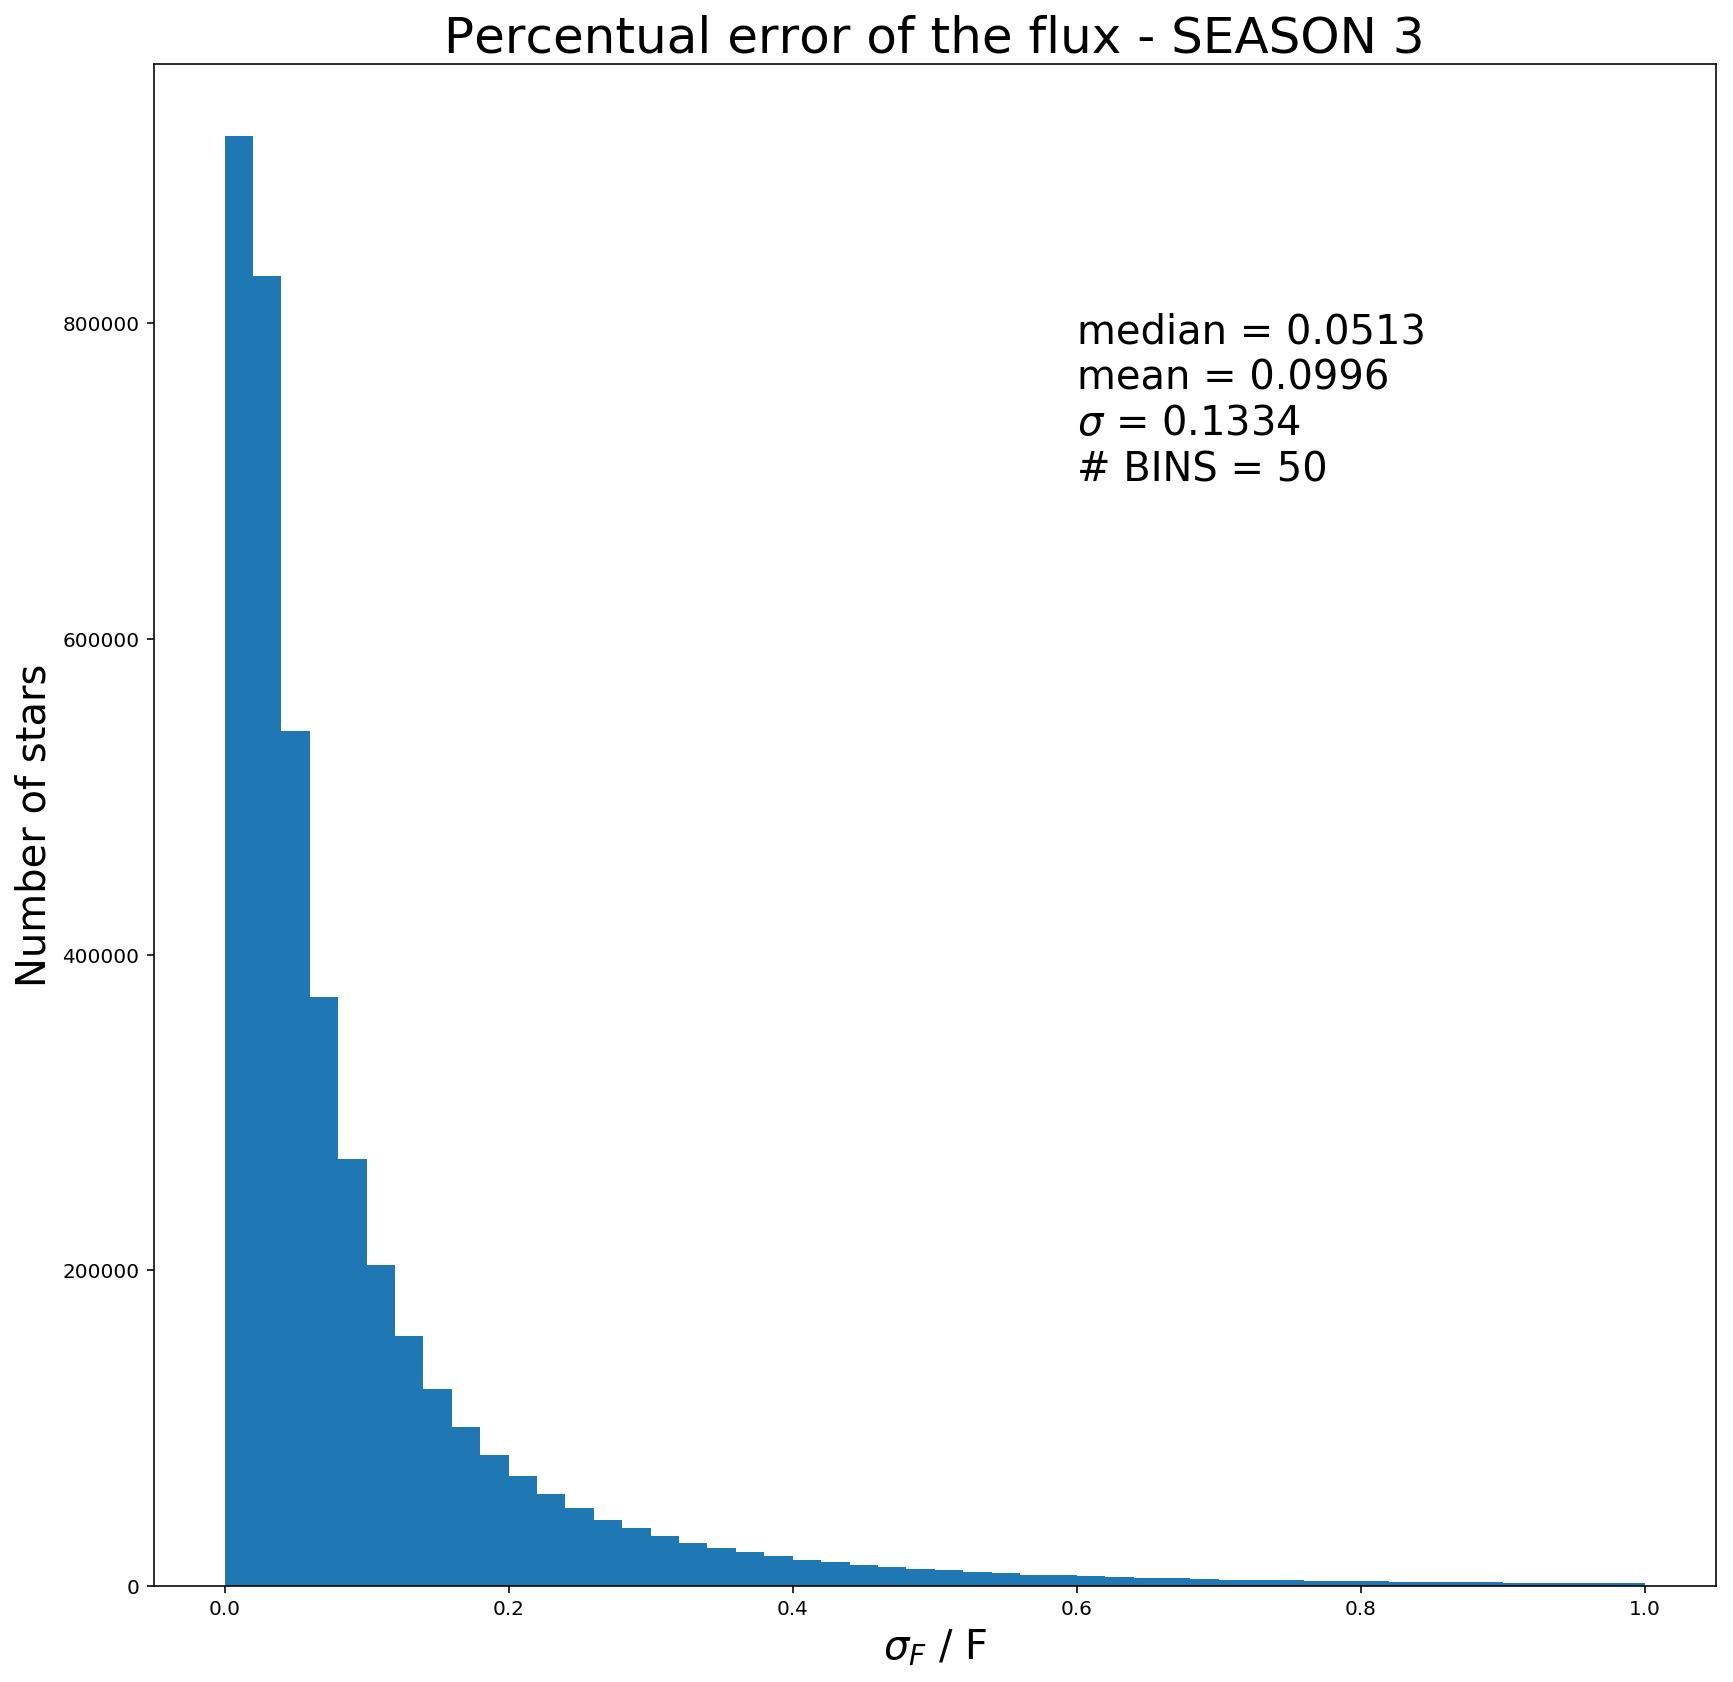

In [38]:
full_hist(3)

0.0003957664471550726 0.999943807859572
4231260


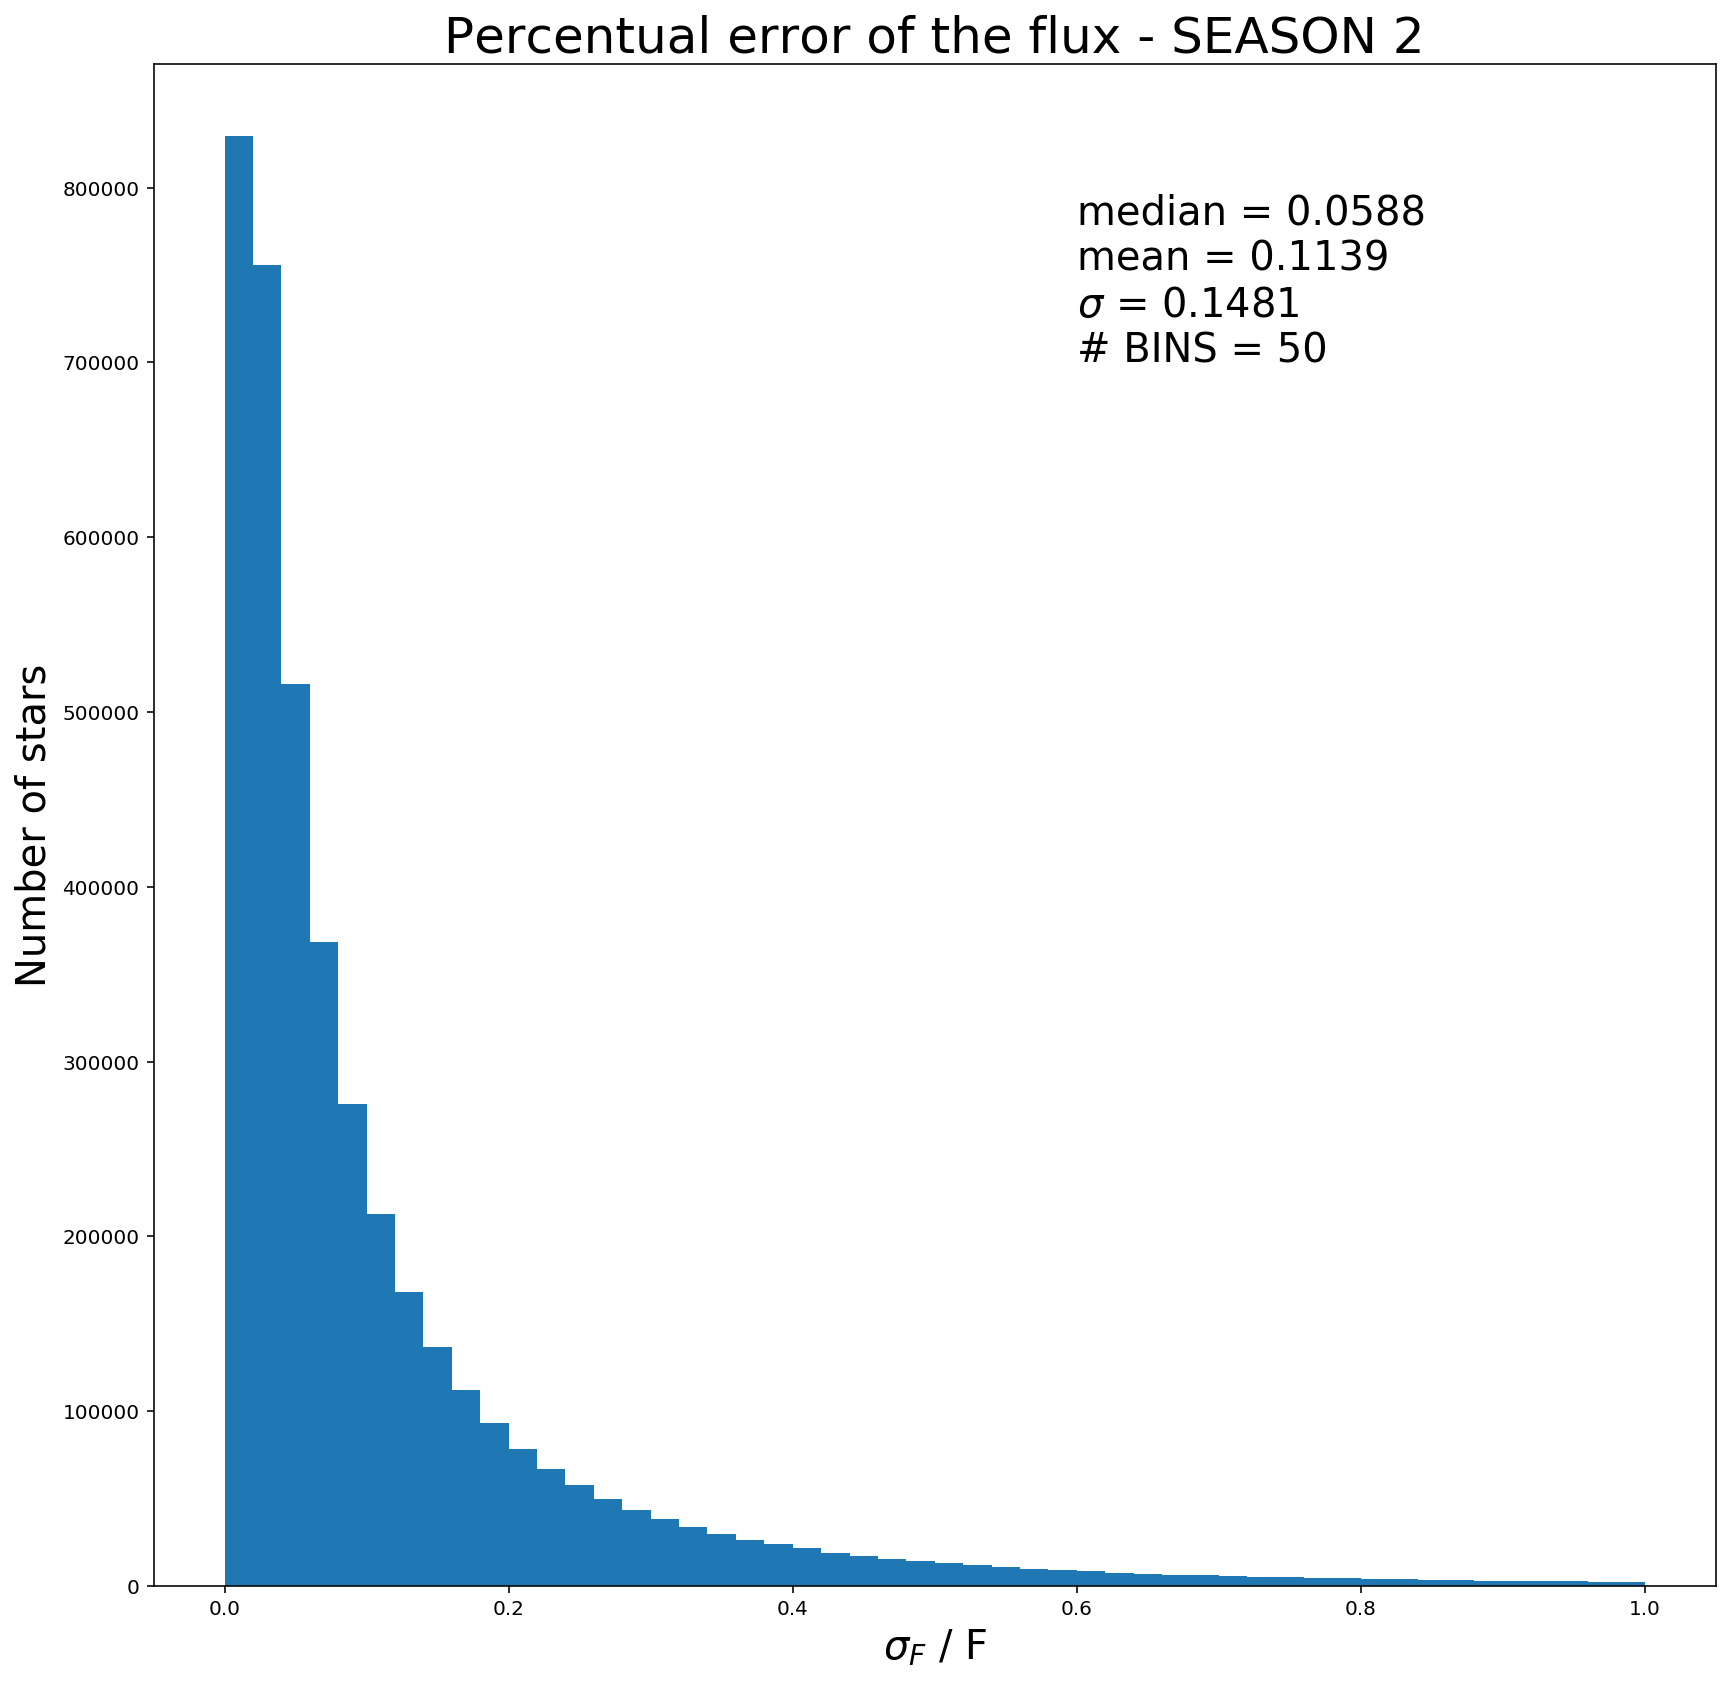

In [39]:
full_hist(2)

0.00032115699831644694 0.9999898491236112
4086254


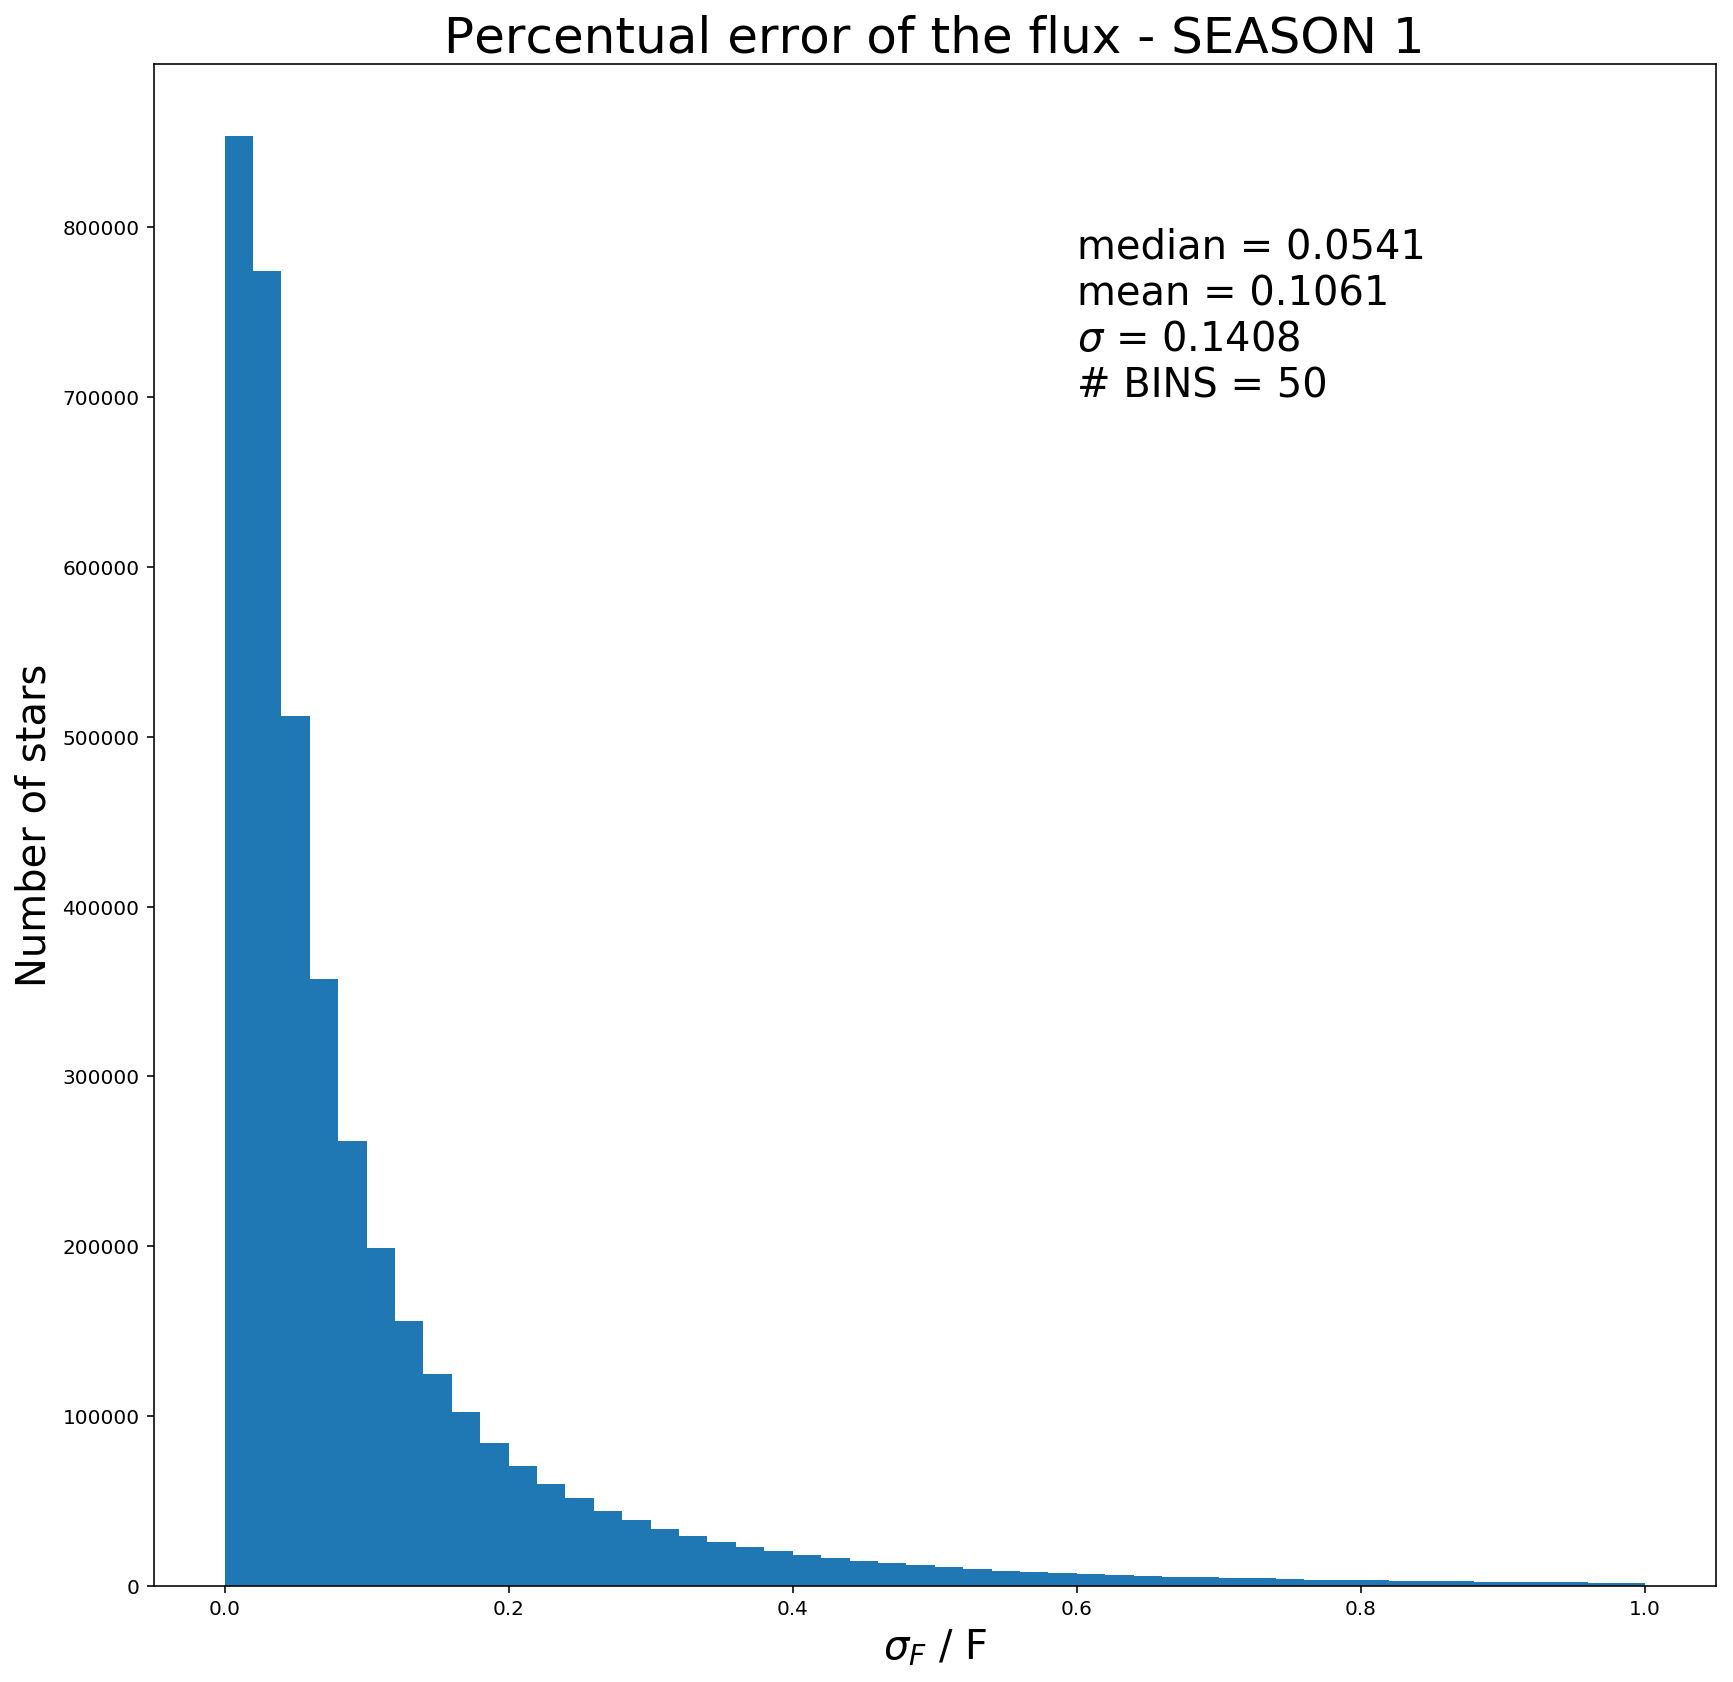

In [40]:
full_hist(1)

0.0002710379525042587 0.9999872140988891
4141379


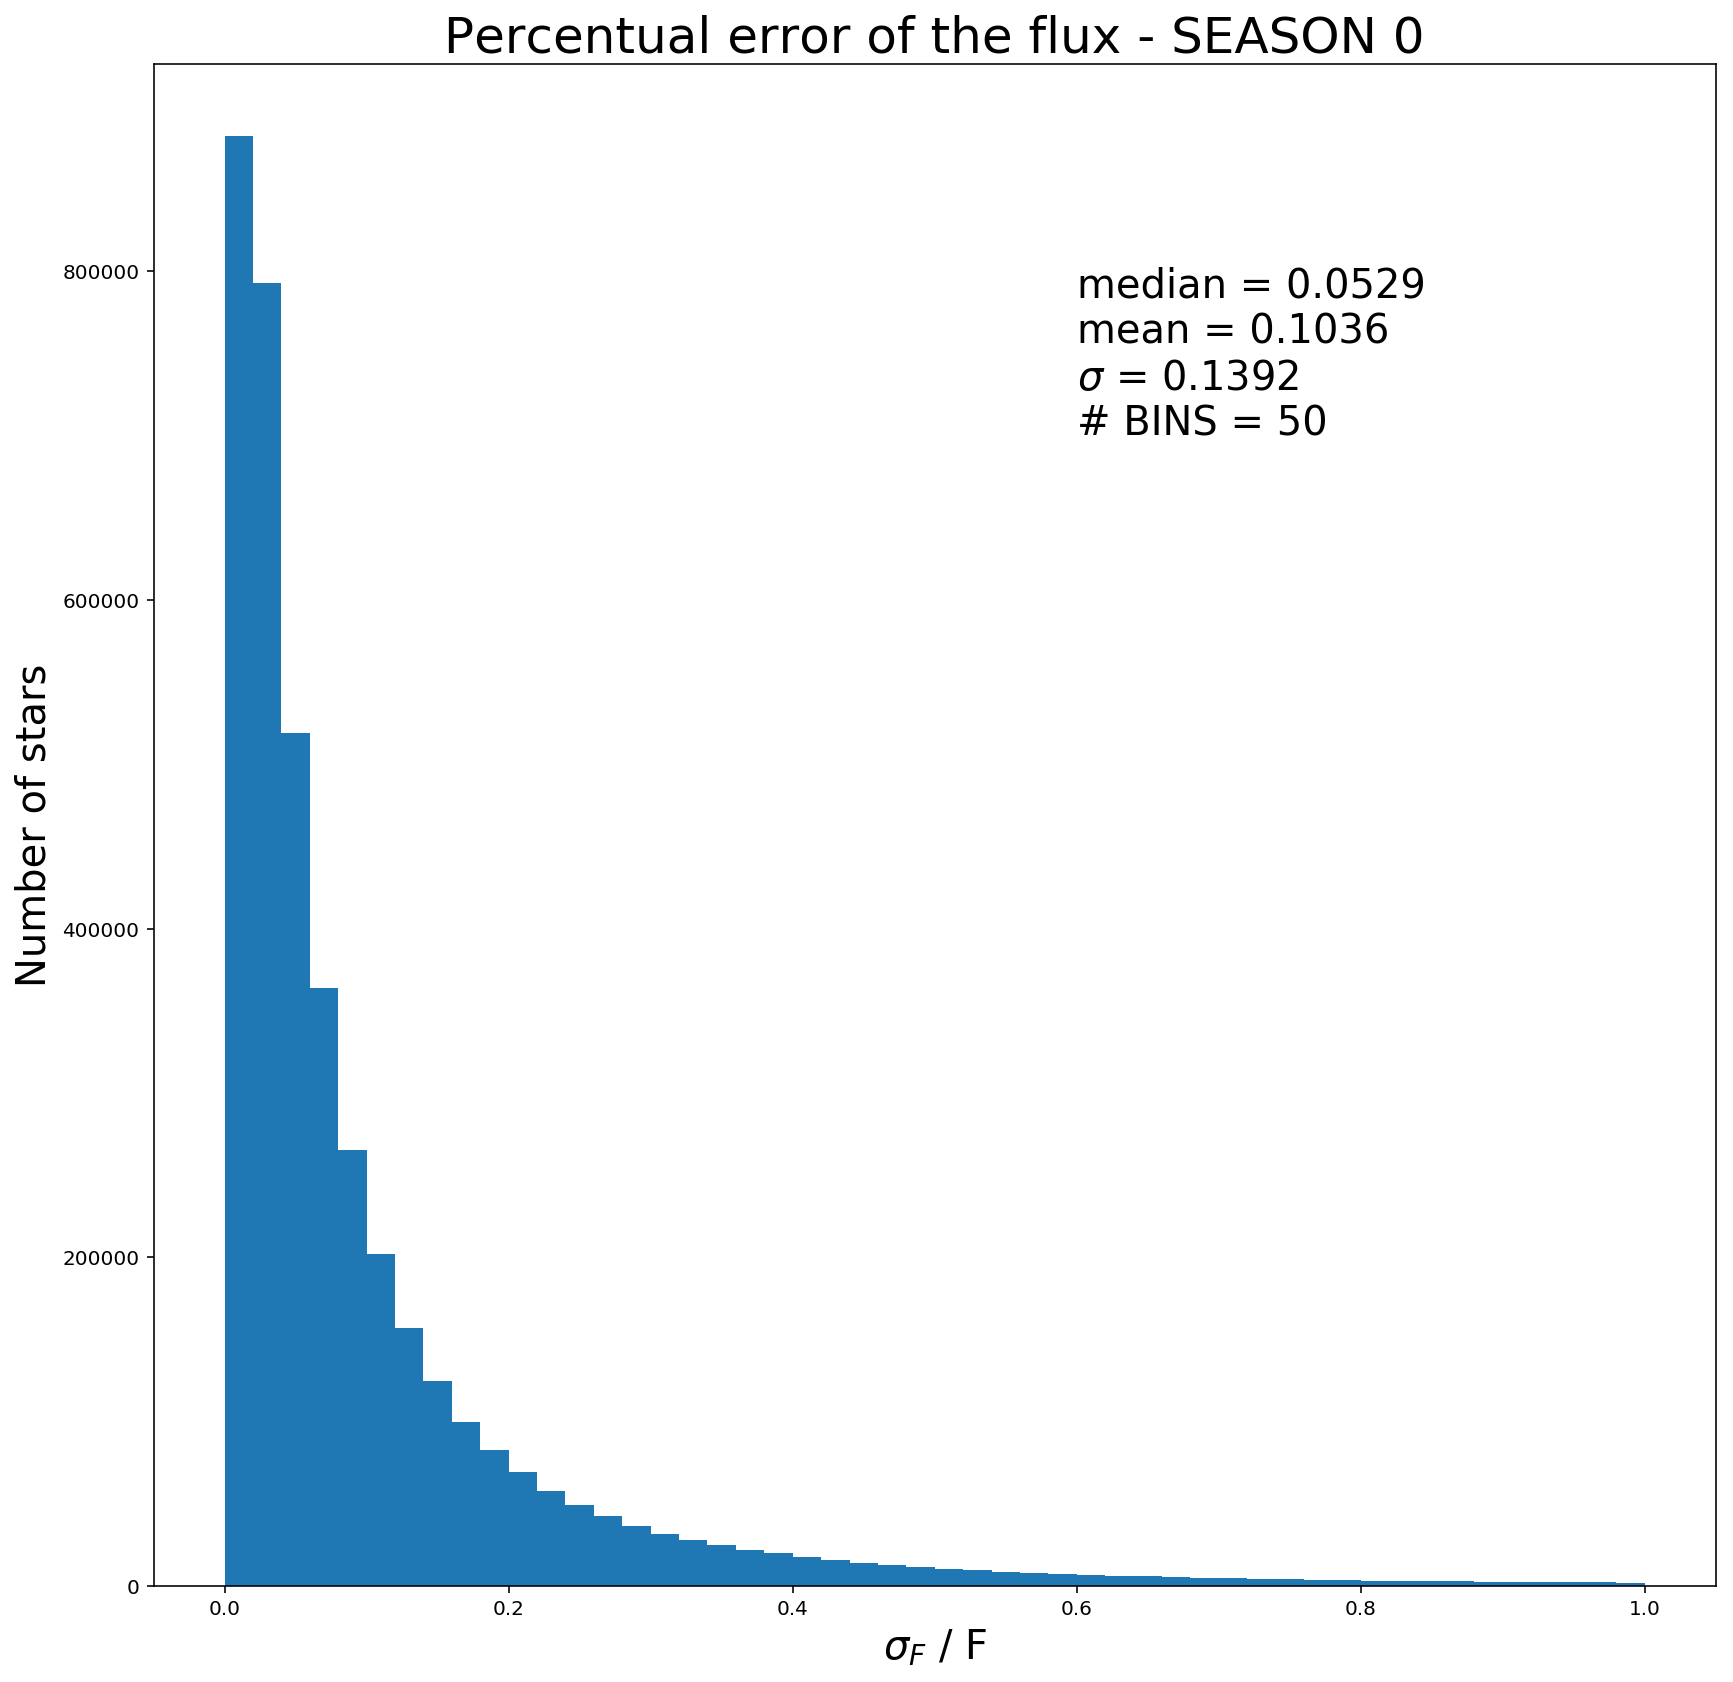

In [41]:
full_hist(0)